In [326]:
import sys
sys.path.append("..")

import Essentials

In [327]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [328]:
data_archive = np.load('../Data_First.npz', allow_pickle=True)

In [329]:
def prepare_Y(y):
    timestamp = y[:, 1]   
    y = y[:, 0].reshape(len(y), 1)
    y = y.astype(np.float64)

    return y, timestamp

In [330]:
all_X_1 = data_archive['all_X_1']
all_Y_1 = data_archive['all_Y_1']

all_X_2 = data_archive['all_X_2']
all_Y_2 = data_archive['all_Y_2']

all_X_3 = data_archive['all_X_3']
all_Y_3 = data_archive['all_Y_3']

x_summer_half_2 = data_archive['x_summer_half_2']
y_summer_half_2 = data_archive['y_summer_half_2']
x_winter_half_2 = data_archive['x_winter_half_2']
y_winter_half_2 = data_archive['y_winter_half_2']

x_summer_half_3 = data_archive['x_summer_half_3']
y_summer_half_3 = data_archive['y_summer_half_3']
x_winter_half_3 = data_archive['x_winter_half_3']
y_winter_half_3 = data_archive['y_winter_half_3']

In [331]:
x_train, x_test, y_train, y_test = train_test_split(all_X_1, all_Y_1, test_size=0.2, random_state=42)

In [332]:
y_train, timestamp_train = prepare_Y(y_train)

In [333]:
y_test, timestamp_test = prepare_Y(y_test)

In [334]:
x_train.shape

(104, 96)

In [335]:
x_test.shape

(27, 96)

In [336]:
x_train_winter, x_test_winter, y_train_winter, y_test_winter = train_test_split(x_winter_half_2, y_winter_half_2, test_size=0.2, random_state=42)

In [337]:
x_train_summer, x_test_summer, y_train_summer, y_test_summer = train_test_split(x_summer_half_2, y_summer_half_2, test_size=0.2, random_state=42)

In [338]:
y_train_summer, timestamp_train_summer = prepare_Y(y_train_summer)

In [339]:
y_train_winter, timestamp_train_winter = prepare_Y(y_train_winter)

In [340]:
y_test_summer, timestamp_test_summer = prepare_Y(y_test_summer)

In [341]:
y_test_winter, timestamp_test_winter = prepare_Y(y_test_winter)

In [342]:
class PCA_LR(Essentials.SoftSensor):
    def __init__(self, name, x_train, y_train, n_components):
        super().__init__(name)
        self.model = LinearRegression()
        self.x_pca = PCA(n_components)
        self.fit_pca(x_train)
        self.train(x_train, y_train)
        self.set_model(self.model)

    def preprocessing(self, x):
        try:
            return self.x_pca.transform(x)
        except Exception as err:
            print("Ошибка трансформации данных:", err)           
    
    def postprocessing(self, x):
        return x

    def fit_pca(self, x):
        self.x_pca.fit(x)

    def evaluate_model(self, x):
        predictions = self.get_model().predict(x)
        return predictions

    def train(self, x_train, y_train):
        x_train_pca = self.preprocessing(x_train)
        self.model.fit(x_train_pca,y_train)

    def __str__(self):
        return  f"Коэффициенты линейной регрссии = {self.get_model().coef_.astype(float).reshape(-1, 1)}, Свободный член = {self.get_model().intercept_.reshape(-1, 1)}"

In [343]:
PCA_LR_test = PCA_LR("PCA_LR" ,x_train ,y_train, 50)

In [344]:
metric = Essentials.R2Metric()

In [345]:
print(PCA_LR_test)

Коэффициенты линейной регрссии = [[ 1.75165226e-05]
 [-1.08485795e-02]
 [ 8.19383458e-04]
 [-3.92427801e-02]
 [ 6.82096833e-02]
 [ 2.74184022e-02]
 [ 7.13515344e-02]
 [-8.62394874e-03]
 [ 1.38488809e-01]
 [ 7.95220438e-02]
 [ 2.70978012e-02]
 [-4.61895198e-02]
 [ 1.13163042e-01]
 [-4.41497734e-02]
 [-2.83590749e-02]
 [-2.15458583e-01]
 [ 1.96263307e-01]
 [-1.43771350e-01]
 [-1.51269456e-01]
 [ 1.92150770e-02]
 [-3.21205037e-01]
 [ 1.88435074e-01]
 [ 2.25374157e-01]
 [-1.84285024e-02]
 [ 3.23338276e-02]
 [ 2.32428628e-01]
 [-7.94255005e-02]
 [-1.55989982e-01]
 [-2.59848600e-01]
 [-4.48903558e-01]
 [-2.94190669e-01]
 [-2.57076622e-01]
 [ 4.88024138e-02]
 [ 1.53639995e-01]
 [-1.99081970e-01]
 [-4.59909808e-01]
 [ 1.14628497e-01]
 [ 4.43384006e-01]
 [-2.69666250e-01]
 [ 3.25981963e-01]
 [-2.03213794e-01]
 [-1.20481249e-01]
 [-6.59539732e-01]
 [ 1.11375785e-01]
 [-3.54486849e-01]
 [-3.23738612e-01]
 [ 4.84829002e-01]
 [ 2.24616969e-01]
 [-4.86268937e-01]
 [ 1.79751211e+00]], Свободный член 

In [346]:
PCA_LR_test.test(x_test, y_test, metric)

(array([[55.09457463],
        [57.3255305 ],
        [55.56692184],
        [58.15756231],
        [59.33089814],
        [56.13604225],
        [60.26053515],
        [47.94283835],
        [59.62328804],
        [60.07116905],
        [53.94603576],
        [58.51254703],
        [59.29039769],
        [52.99956955],
        [51.14664001],
        [52.65548568],
        [60.17630016],
        [65.26451147],
        [54.1632973 ],
        [60.56445527],
        [60.37246825],
        [53.30311003],
        [58.42889275],
        [55.62256918],
        [61.71878197],
        [60.0867244 ],
        [59.54684753]]),
 0.7094163371137975)

In [347]:
PCA_LR_test_visual_train = Essentials.Visualizer(x_train, y_train, timestamp_train, [metric], 'Linear with PCA SoftSensor R2 metric on Train')

        Coefficient of determination
PCA_LR                      0.921648


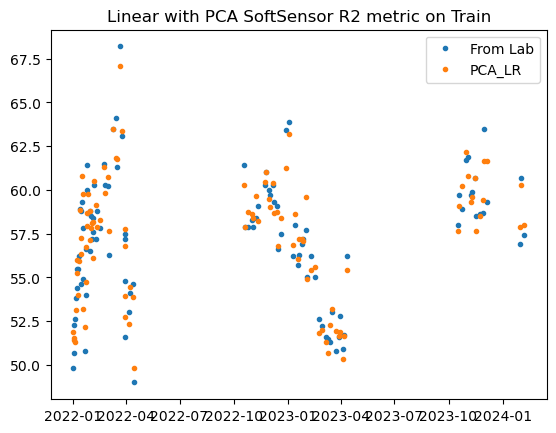

In [348]:
PCA_LR_test_visual_train.visualize([PCA_LR_test])

In [349]:
PCA_LR_test_visual_test = Essentials.Visualizer(x_test, y_test, timestamp_test, [metric], 'Linear with PCA SoftSensor R2 metric on Test')

        Coefficient of determination
PCA_LR                      0.709416


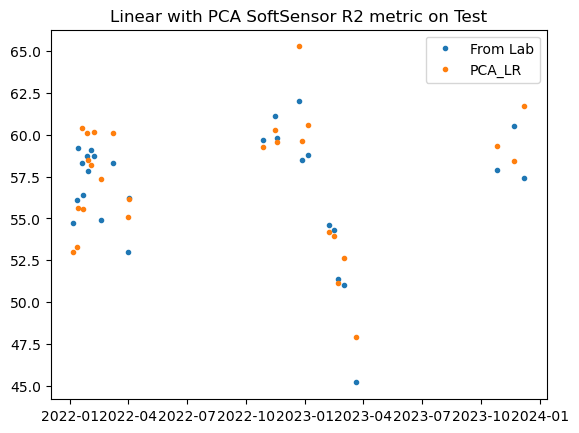

In [350]:
PCA_LR_test_visual_test.visualize([PCA_LR_test])